# Logistic function

logistic function, Monod function
Limiting behaviour of these, links with growth and decay
It will cover the informal notion of a limit






## Logistic function

#### Logistic model

\begin{equation}
P_{n+1}=P_n+r P_n(1-P_n/M)
\end{equation}
* r is Malthusian growth rate
* M is carrying capacity

If a population experiences large fluctuations, then for very large populations the logistic growth model may return a negative population in the next generation, which is unrealistic

Note: we can rewrite

\begin{equation}
P_{n+1}=P_n(1+r)-r P_n^2/M = R P_n (1-P_n/K)
\end{equation}
where $R=(1+r)$ and $K=M(1+r)/r$

That is,

\begin{equation}
y=Rx(1-x/K)
\end{equation}

Notice that $y/x=R-R/K x$ is linear.


### Ricker's model

\begin{equation}
P_{n+1}=a P_n e^{-b P_n}
\end{equation}

It is formulated in such a way that $P_{n+1}$ cannot become negative, even if $P_n \gg K$ where $K$ is the carrying capacity. Consequently it is somewhat more realistic, and "safer" to use.

\begin{equation}
y = a x e^{-b x}\quad \Rightarrow \quad \frac{y}{x}=a e^{-bx}
\end{equation}

Note that the following result is linear:

\begin{equation}
\ln\left(\frac{y}{x}\right)=\ln(a)-bx
\end{equation}

### Beetles

Measurements every 2 ?weeks?

$x_n$: 4, 4, 25, 63, 147, 285, 345, 361, 405, 471, 420, 430, 420, 475, 435, 480

Plot $x_{n+1}$ against $x_n$

Try fitting
* $y=Rx(1-x/k)$ (logistic function)
* $y=ax/(1+bx)^c$ (Hassell function)

The Hassell fit is "better" in the sense that it has lower least squares difference, and that it doesn't go negative.

C:\Users\Ella Metcalfe\AppData\Local\Temp\ipykernel_1092\3650714485.py:11: RuntimeWarning: divide by zero encountered in divide
  return a*x/(1+b*x)**c
C:\Users\Ella Metcalfe\AppData\Local\Temp\ipykernel_1092\3650714485.py:11: RuntimeWarning: invalid value encountered in power
  return a*x/(1+b*x)**c


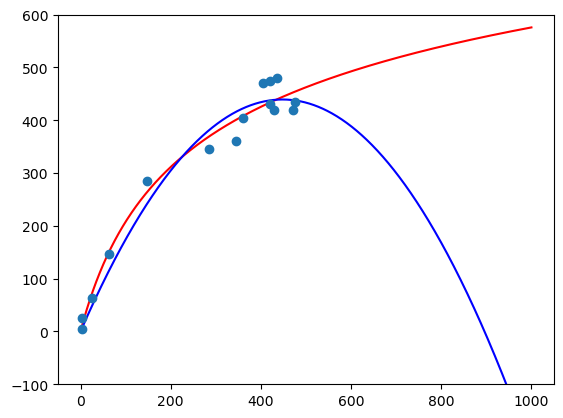

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

beetles=np.array([4, 4, 25, 63, 147, 285, 345, 361, 405, 471, 420, 430, 420, 475, 435, 480])

xdata=beetles[0:-1]
ydata=beetles[1:]

def hass(x, a, b, c):
    return a*x/(1+b*x)**c

def logis(x,R,K):
  return R*x*(1-x/K)

xx=np.linspace(0,1000,1000)

popt, pcov = curve_fit(hass,xdata,ydata)
plt.plot(xx, hass(xx, *popt), 'r-',
         label='hass: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(logis,xdata,ydata)
plt.plot(xx, logis(xx, *popt), 'b-',
         label='logis: R=%5.3f, K=%5.3f' % tuple(popt))

plt.plot(xdata,ydata,'o')
plt.ylim([-100,600])
plt.show()


### Goodness of fit

Try plotting

```{math}
-\ln\left(\frac{1-\hat{y}}{y}\right)
```
where $\hat{y}$ is the normalised data. If it looks pretty linear then the logistic function should fit.

Why? Rearrange:

```{math}
y=\frac{1}{1+e^{-\mu(x-x_0)}} \quad \Rightarrow \quad
-\ln\left(\frac{1-\hat{y}}{y}\right)=\mu(x-x_0)
```

# Beverton-Holt

## Beverton-Holt equation:

\begin{equation*}
x_{t+1}=\frac{\nu k x_t}{k+(\nu-1)x_t}
\end{equation*}

Gives

\begin{align*}
\frac{x_{t+1}-x_t}{x_{t+1}}&=1-x_t\left[\frac{k+(\nu-1)x_t}{\nu k x_t}\right]\\
&=\frac{1}{\nu}\left[(\nu-1)-\frac{\nu-1}{k}x_t\right]
\end{align*}

Thus,
\begin{equation*}
x_{t+1}-x_t = \frac{\nu-1}{\nu}x_{t+1}\left(1-\frac{x_t}{k}\right)
\end{equation*}

We have obtained the discrete analogy of the logistic equation:
\begin{equation}
\Delta x_t = \alpha x_{t+1}\left(1-\frac{x_t}{k}\right)
\end{equation}

The general solution is

\begin{equation}
x_t = \frac{\nu^t k x_0}{k+(\nu^t-1)x_0}
\end{equation}

This can be proved by a technique called proof by induction (not covered in this course).

### Equilibrium

\begin{align}
x&=\frac{\nu k x}{k+(\nu-1)x}\quad \Rightarrow \quad kx+(\nu-1)x^2=\nu k x\\
&\Rightarrow \quad (\nu-1)(x^2-kx)=0 \quad \Rightarrow x(x-k)=0, \quad (\nu\neq 1)\\
& \Rightarrow \quad x=k.
\end{align}

### Exercise

Consider the function
\begin{equation}
x_{k+1}=\frac{\nu k x_k}{k+(\nu-1)x_k}
\end{equation}

The shape of this function is the same for different values of $k$, so we will take $k=1$ and consider how the shape depends on $\nu$.

Plot $x_{k+1}$ aginst $x_k$ for $\mu=[1,2,10,100]$.


Can observe that in this model, if $\mu$ is large then there is a strong population control. Even if the population is reduced below its equilibrium level it recovers quickly.

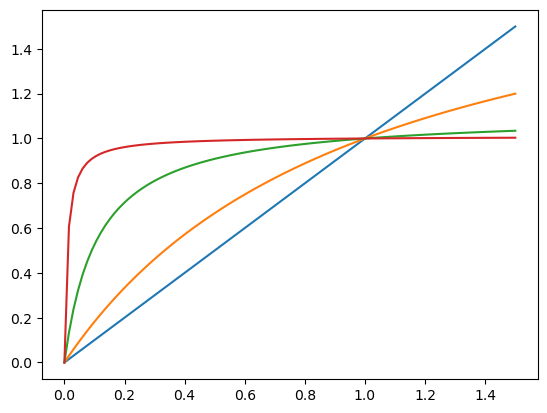

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def y(p,nu):
  num = nu*p
  den = 1+(nu-1)*p
  return num/den

x=np.linspace(0,1.5,100)

plt.plot(x,y(x,1))
plt.plot(x,y(x,2))
plt.plot(x,y(x,10))
plt.plot(x,y(x,100))
plt.show()

## Fréchet

Google trends:

[Call me maybe](https://trends.google.com/trends/explore?date=2011-01-01%202015-01-01&q=call%20me%20maybe)

Can try fitting *cumulative* data to the Fréchet function

```{math}
F(t)=e^{-(t/\beta)^{-\alpha}}
```

Try plotting

```{math}
-\ln\left(\frac{y}{y^{\prime}}\right)
```

If it looks pretty linear then the Frechet function should fit.

Why? Rearrange:

```{math}

```

### Exercise

Use Google trends to obtain search data for your own choice of meme/viral video and fit the Frechet function to this data using Python.

In Google trends you can specify the data, and choose between Worldwide or specific country, you can also choose Google search data or YouTube data, etc. Provide the url link to the dataset you used. Did you obtain a good fit? Why do you think this is?


## Comment on over-fitting:
See [this paper](https://www.nature.com/articles/427297a). Quote attributed to von Neumann is "with four parameters I can fit an elephant, and with five I can make him wiggle his trunk". What did he mean?

Search for models with only a few parameters that capture general trends.